#### 1.문제정의
- 자전거 렌탈 수요 예측
- train : 매달 19일까지
- test : 매달 20일부터 ~ 월 말까지
- 시간단위로 수집된(시계열data set)

In [2]:
#Data Fields
''' datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals '''

' datetime - hourly date + timestamp  \nseason -  1 = spring, 2 = summer, 3 = fall, 4 = winter \nholiday - whether the day is considered a holiday\nworkingday - whether the day is neither a weekend nor holiday\nweather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy\n2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog \ntemp - temperature in Celsius\natemp - "feels like" temperature in Celsius\nhumidity - relative humidity\nwindspeed - wind speed\ncasual - number of non-registered user rentals initiated\nregistered - number of registered user rentals initiated\ncount - number of total rentals '

#### 2.데이터수집
- kaggle 사이트에서 자전거 렌탈 정보를 다운로드

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #시각화 도구

In [6]:
train = pd.read_csv('./Data3/train.csv', parse_dates=['datetime'])   #시간형으로바꿔줌(원래 object였음)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train.info()  #전체적인 데이터에 대한 정보 얻을 수 잇음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


#### 3~4.데이터 전처리 및 탐색(EDA)
##### 날짜 데이터 파싱하기

In [14]:
train['datetime-year'] = train['datetime'].dt.year #dt의 year만 추출하여 새로운 컬럼 생성됨
train['datetime-month'] = train['datetime'].dt.month
train['datetime-day'] = train['datetime'].dt.day
train['datetime-hour'] = train['datetime'].dt.hour
train['datetime-minute'] = train['datetime'].dt.minute
train['datetime-second'] = train['datetime'].dt.second

In [15]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


- 년도, 월, 날짜, 시간에 따라 자전거 대여갯수의 차이가 클까?

##### year

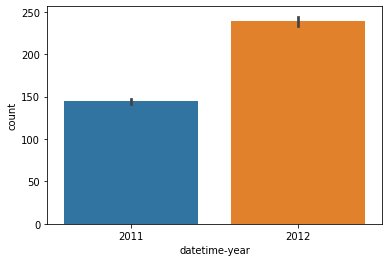

In [22]:
sns.barplot(data=train, x='datetime-year', y='count', estimator=np.mean) 
#x축에는 year, y축에는 렌탈횟수, 년도별(default)mean는평균치알려줌..max 등 있음

- 11년도에 비해서 12년도의 대여 횟수가 많다.

##### month

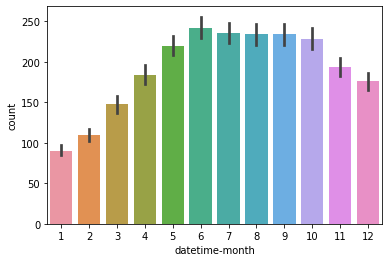

In [23]:
sns.barplot(data=train, x='datetime-month', y='count', estimator=np.mean)

##### day

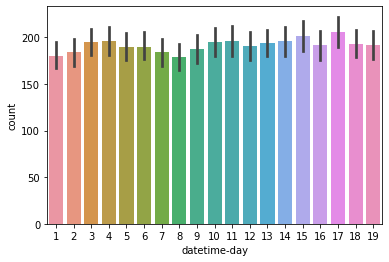

In [24]:
sns.barplot(data=train, x='datetime-day', y='count', estimator=np.mean)

##### hour

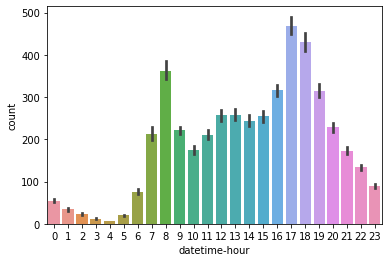

In [25]:
sns.barplot(data=train, x='datetime-hour', y='count', estimator=np.mean)

- 출퇴근시간과 선선한 저녁시간

##### minute

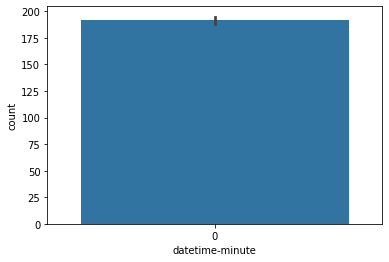

In [26]:
sns.barplot(data=train, x='datetime-minute', y='count', estimator=np.mean)

##### second

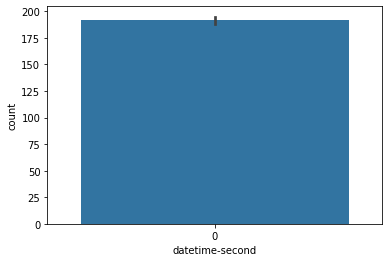

In [27]:
sns.barplot(data=train, x='datetime-second', y='count', estimator=np.mean)

- 분,초는 데이터에 기재되어있지 않음

- year, month, hour는 의미가 있을 것 같다!
- day, minute, second는 의미가 없다.

##### season

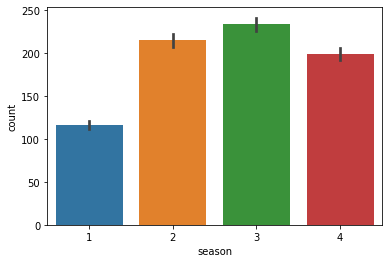

In [28]:
sns.barplot(data=train, x='season', y='count')

##### weather

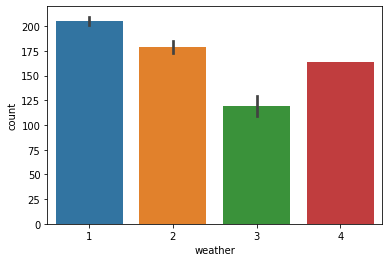

In [29]:
sns.barplot(data=train, x='weather', y='count')

날씨
- 1 : 클리어, 약간 구름, 부분적으로 흐림, 부분적으로 흐림
- 2 : 안개 + 흐림, 안개 + 부서진 구름, 안개 + 약간의 구름, 안개
- 3 : 약한 눈, 약한 비 + 뇌우 + 흩어진 구름, 약한 비 + 흩어진 구름
- 4 : 폭우 + 얼음 깔판 + 뇌우 + 미스트, 눈 + 안개

In [32]:
train[train['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0,0


- 4번 날씨는 1건밖에 없었다..! 속지 말기

##### 주중과 주말: workingday

In [34]:
train['workingday'].unique()

array([0, 1], dtype=int64)

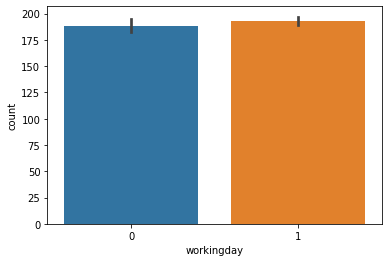

In [35]:
sns.barplot(data=train, x='workingday', y='count')

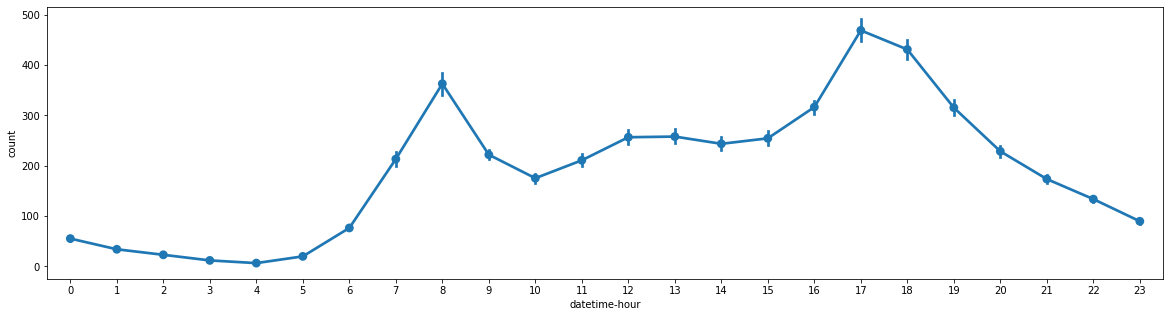

In [37]:
plt.figure(figsize=(20,5)) #가로,세로
sns.pointplot(data=train, x='datetime-hour',y='count')

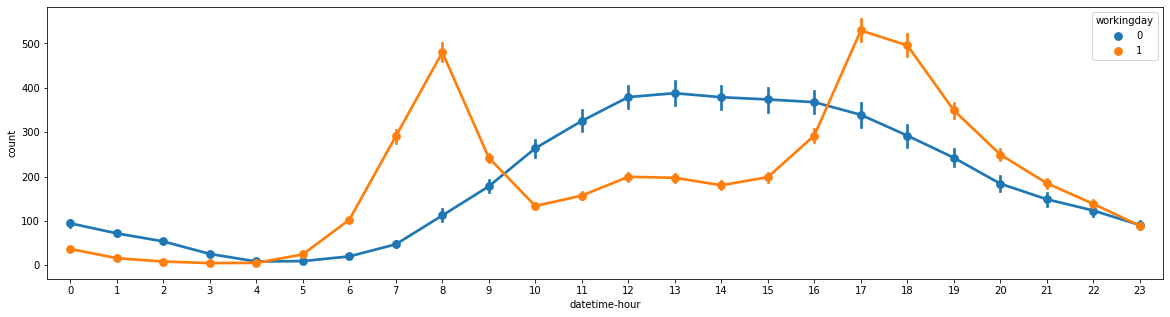

In [38]:
plt.figure(figsize=(20,5)) #가로,세로
sns.pointplot(data=train, x='datetime-hour',y='count', hue='workingday')

- 0 (주말)에는 오후에 대여량이 많고 (출퇴근시간으로 추측)
- 1 (주중)에는 출,퇴근 시간에 대여량이 많다.

In [39]:
train['datetime-dayofweek'] = train['datetime'].dt.dayofweek

In [40]:
train['datetime-dayofweek'].unique()

array([5, 6, 0, 1, 2, 3, 4], dtype=int64)

##### 요일

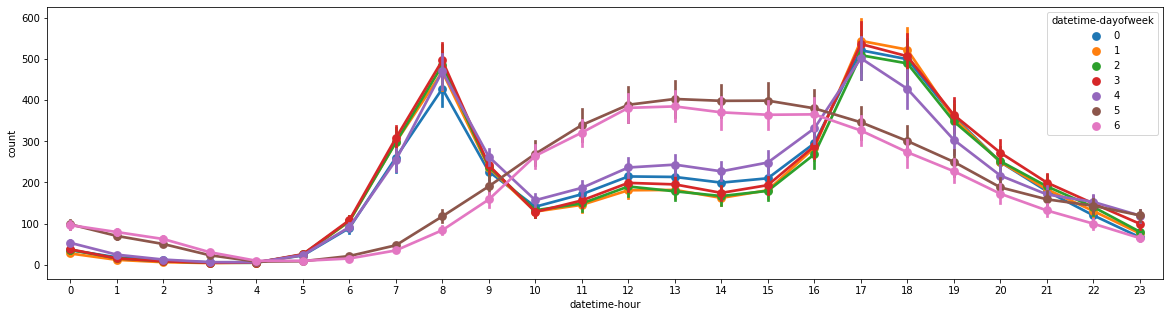

In [42]:
plt.figure(figsize=(20,5)) #가로,세로
sns.pointplot(data=train, x='datetime-hour',y='count', hue='datetime-dayofweek')

- 월, 금요일이 주말의 연장선상으로 약간 변화가 있다.

##### 온도, 체감온도, 습도, 풍속

In [44]:
train_corr = train[['temp','atemp','humidity','windspeed','count']]

In [46]:
train_corr.corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


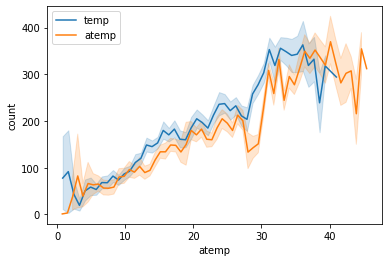

In [47]:
sns.lineplot(data=train, x='temp',y='count',label='temp')
sns.lineplot(data=train, x='atemp',y='count',label='atemp')

In [49]:
train.shape

(10886, 19)

In [50]:
train[train['temp']>=30].shape

(1244, 19)

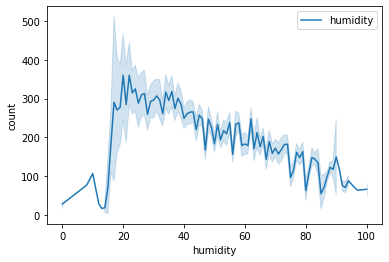

In [51]:
sns.lineplot(data=train, x='humidity',y='count',label='humidity')

- 습도 높아질수록 대여량이 떨어지고 있음
- *초반 불안한데이터들은 --> 데이터들이 부족해서 일어나는 현상일 수 있음 --> 확인 필요!

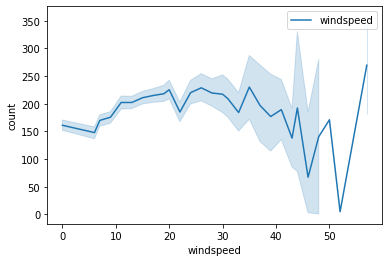

In [52]:
sns.lineplot(data=train, x='windspeed',y='count',label='windspeed')

#### 5.모델링

In [55]:
feature_names=['season','workingday','weather','temp','atemp','humidity','datetime-year',
              'datetime-hour','datetime-month','datetime-dayofweek']

In [58]:
X_train = train[feature_names]
X_train

,season,workingday,weather,temp,atemp,humidity,datetime-year,datetime-hour,datetime-month,datetime-dayofweek
0,1,0,1,9.84,14.395,81,2011,0,1,5
1,1,0,1,9.02,13.635,80,2011,1,1,5
2,1,0,1,9.02,13.635,80,2011,2,1,5
3,1,0,1,9.84,14.395,75,2011,3,1,5
4,1,0,1,9.84,14.395,75,2011,4,1,5
...,...,...,...,...,...,...,...,...,...,...
10881,4,1,1,15.58,19.695,50,2012,19,12,2
10882,4,1,1,14.76,17.425,57,2012,20,12,2
10883,4,1,1,13.94,15.910,61,2012,21,12,2
10884,4,1,1,13.94,17.425,61,2012,22,12,2


In [60]:
y_train = train['count']

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rf_model = RandomForestRegressor(n_estimators=1000,
                                max_depth=8, #최대깊이8
                                min_samples_leaf=15)
                        #트리가 리프노드로 갈라지기전에는 최소이만큼있어야한다_ 작을수록 모델복잡                         

In [63]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=15,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#테스트데이터 로딩
# 시간데이터 분할
# train과 똑같은 feature 선택 -> X_test 

In [64]:
#pre = rf.model.predict(X_test) #이걸 캐글사이트에 올리면 점수 얻을 수 있음

NameError: name 'rf' is not defined

In [65]:
# 테스트데이터 로딩
test = pd.read_csv('./Data3/test.csv', parse_dates=['datetime'])

In [66]:
# 시간데이터 분할
test['datetime-year'] = test['datetime'].dt.year
test['datetime-month'] = test['datetime'].dt.month
test['datetime-day'] = test['datetime'].dt.day
test['datetime-hour'] = test['datetime'].dt.hour
test['datetime-minute'] = test['datetime'].dt.minute
test['datetime-second'] = test['datetime'].dt.second
test['datetime-dayofweek'] = test['datetime'].dt.dayofweek

In [67]:
# train과 똑같은 feature 선택 -> X_test
X_test = test[feature_names]
X_test

,season,workingday,weather,temp,atemp,humidity,datetime-year,datetime-hour,datetime-month,datetime-dayofweek
0,1,1,1,10.66,11.365,56,2011,0,1,3
1,1,1,1,10.66,13.635,56,2011,1,1,3
2,1,1,1,10.66,13.635,56,2011,2,1,3
3,1,1,1,10.66,12.880,56,2011,3,1,3
4,1,1,1,10.66,12.880,56,2011,4,1,3
...,...,...,...,...,...,...,...,...,...,...
6488,1,1,2,10.66,12.880,60,2012,19,12,0
6489,1,1,2,10.66,12.880,60,2012,20,12,0
6490,1,1,1,10.66,12.880,60,2012,21,12,0
6491,1,1,1,10.66,13.635,56,2012,22,12,0


In [68]:
# test셋 예측
pre = rf_model.predict(X_test)